## **CIND 820 - Big Data Analytics Project**

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # to create the scree plot
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

**Create a data frame of the Room Occupancy dataset. Display the names of the columns. Check the data types of the attributes. Run a summary statistics of the dataset.**

In [26]:
# Read the CSV file into a data frame called Occupancy
Occupancy = pd.read_csv('Occupancy_Estimation.csv')

# Display the first five records of the data frame
Occupancy.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Get the column names
print("Column Names:", Occupancy.columns)

Column Names: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [4]:
# Get the data types of each column
print("\nData Types of Each Column:")
print(Occupancy.dtypes)


Data Types of Each Column:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [5]:
# Get the summary statistics
print("Summary Statistics:")
print(Occupancy.describe())

Summary Statistics:
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744  

**Standardize the features**

In [27]:
# Create the scaler
scaler = StandardScaler()   # mean = 0 and standard deviation = 1

# Transform the numeric data
X = pd.DataFrame(scaler.fit_transform(Occupancy.iloc[:, 2:16]))

# Add the binary features
X['S6_PIR'] = Occupancy['S6_PIR']
X['S7_PIR'] = Occupancy['S7_PIR']

# Add the column names for the features
X.columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
             'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
             'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
             'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

# Define the target variable
y = Occupancy['Room_Occupancy_Count']

In [7]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,0,0
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,0,0
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,0,0
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,0,0
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,0,0


**Check the Co-relation between featrues without PCA**

<Axes: >

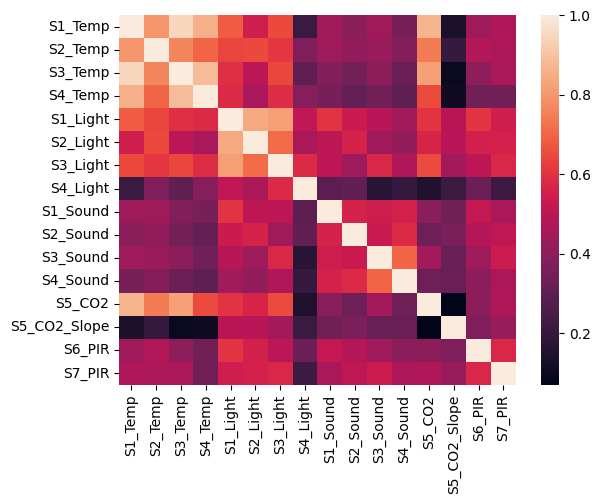

In [28]:
# Check the Co-relation between features without PCA
sns.heatmap(X.corr())

Based on the above heatmap, we can see that several pairs of features have moderate to highter correlation.

**Applying Principal Component Analysis**

I've chosen 5 as the number of principal components we want in our final dataset.

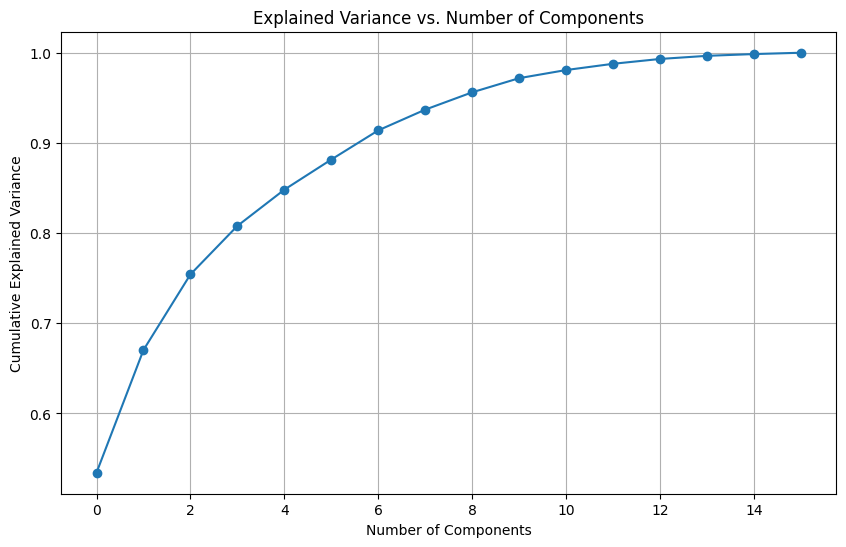

In [40]:
# Plotting cumulative explained variance to choose the optimal number of components
pca_full = PCA().fit(X)
plt.figure(figsize=(10, 6)) 
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [41]:
np.cumsum(pca_full.explained_variance_ratio_)

array([0.53420654, 0.6703093 , 0.75417075, 0.8079521 , 0.84815055,
       0.88157964, 0.91392404, 0.93691635, 0.9561106 , 0.97180268,
       0.98081481, 0.98773636, 0.99309256, 0.99655362, 0.99851644,
       1.        ])

In [43]:
# Applying PCA
# Taking no. of Principal Components as 7
pca = PCA(n_components = 7)
pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.686113,2.102322,1.957106,0.191789,-0.101719,-0.803158,-0.143256
1,-0.131358,2.522851,1.541169,0.622188,0.541418,-1.301222,2.233778
2,-0.450642,2.154163,1.734071,0.452159,0.136148,-1.086528,0.864504
3,-0.383169,2.119162,1.594852,0.562530,0.021398,-1.083995,0.785992
4,-0.683429,1.742131,1.870580,0.427451,-0.191480,-1.099345,0.302282


**Create the Scree Plot**

In [44]:
# Calculate the percentage of total variance explained by each principal component
print(pca.explained_variance_ratio_)

[0.53420654 0.13610276 0.08386145 0.05378135 0.04019845 0.0334291
 0.0323444 ]


- The first principal component explains **53.42%** of the total variation in the dataset.
- The second principal component explains **13.61** of the total variation in the dataset.
- The third principal component explains **8.39%** of the total variation in the dataset.
- The fourth principal component explains **5.38%** of the total variation in the dataset.
- The fifth principal component explains **4.02%** of the total variation in the dataset.
- The sixth principal component explains **3.34%** of the total variation in the dataset.
- The seventh principal component explains **3.23%** of the total variation in the dataset.

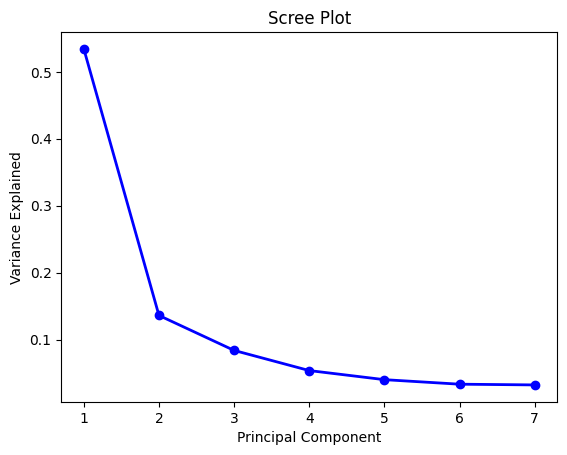

In [45]:
# Plot the scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [46]:
# Display feature contributions (loadings) for the first two principal components
pca = PCA(n_components=2)
pca.fit(X)

feature_names = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
             'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
             'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
             'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']


loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
print(loadings)

                   PC1       PC2
S1_Temp       0.311282 -0.323016
S2_Temp       0.299695 -0.197385
S3_Temp       0.299219 -0.356311
S4_Temp       0.278824 -0.324778
S1_Light      0.318130  0.107028
S2_Light      0.291981  0.147959
S3_Light      0.311904  0.064052
S4_Light      0.177232  0.113372
S1_Sound      0.241923  0.253501
S2_Sound      0.230842  0.302862
S3_Sound      0.239889  0.238537
S4_Sound      0.219939  0.311745
S5_CO2        0.287106 -0.296635
S5_CO2_Slope  0.150390  0.415337
S6_PIR        0.063995  0.042659
S7_PIR        0.063087  0.039614


In [36]:
loadings['PC1'].nlargest(5)

S1_Light    0.318130
S3_Light    0.311904
S1_Temp     0.311282
S2_Temp     0.299695
S3_Temp     0.299219
Name: PC1, dtype: float64

In [37]:
loadings['PC1'].nsmallest(5)

S7_PIR          0.063087
S6_PIR          0.063995
S5_CO2_Slope    0.150390
S4_Light        0.177232
S4_Sound        0.219939
Name: PC1, dtype: float64

In [38]:
loadings['PC2'].nlargest(5)

S5_CO2_Slope    0.415337
S4_Sound        0.311745
S2_Sound        0.302862
S1_Sound        0.253501
S3_Sound        0.238537
Name: PC2, dtype: float64

In [39]:
loadings['PC2'].nsmallest(5)

S3_Temp   -0.356311
S4_Temp   -0.324778
S1_Temp   -0.323016
S5_CO2    -0.296635
S2_Temp   -0.197385
Name: PC2, dtype: float64

**Checking Co-relation between features after PCA**

<Axes: >

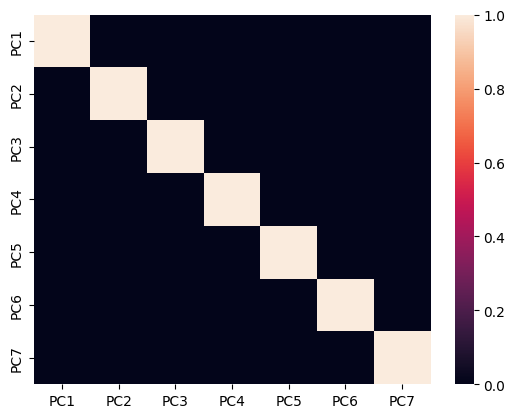

In [47]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

Based on the above heatmap, there is no correlation between the principal components (PC1, PC2, PC3, PC4, and PC5).

In [48]:
# Add the Room_Occupancy_Count to the reduced dataset
data_pca['Room_Occupancy_Count'] = y
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Room_Occupancy_Count
0,-0.686113,2.102322,1.957106,0.191789,-0.101719,-0.803158,-0.143256,1
1,-0.131358,2.522851,1.541169,0.622188,0.541418,-1.301222,2.233778,1
2,-0.450642,2.154163,1.734071,0.452159,0.136148,-1.086528,0.864504,1
3,-0.383169,2.119162,1.594852,0.562530,0.021398,-1.083995,0.785992,1
4,-0.683429,1.742131,1.870580,0.427451,-0.191480,-1.099345,0.302282,1


In [49]:
# Export CSV to working directory
data_pca.to_csv('pca.csv')